# Imports For EDA

In [1]:
from sklearn import datasets

# EDA
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # plotting, titles, legends

# HeatMap, violin, linear regression plots
import seaborn as sns # advanced plotting built on top of matplotlib

# Google Colab automatically displays this line:
%matplotlib inline

# Load Dataset into variables

In [2]:
wine = datasets.load_wine() # load dataset
print(wine.DESCR) # understanding the dataset

df = pd.DataFrame(wine.data, columns=wine.feature_names) # turn into dataframe & setting columns

print('\n')  # Prints a newline
print(df) #printing dataframe

df['target'] = wine.target # adding the target columns to the main dataset



.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

:Number of Instances: 178
:Number of Attributes: 13 numeric, predictive attributes and the class
:Attribute Information:
    - Alcohol
    - Malic acid
    - Ash
    - Alcalinity of ash
    - Magnesium
    - Total phenols
    - Flavanoids
    - Nonflavanoid phenols
    - Proanthocyanins
    - Color intensity
    - Hue
    - OD280/OD315 of diluted wines
    - Proline
    - class:
        - class_0
        - class_1
        - class_2

:Summary Statistics:

============================= ==== ===== ======= =====
                                Min   Max   Mean     SD
============================= ==== ===== ======= =====
Alcohol:                      11.0  14.8    13.0   0.8
Malic Acid:                   0.74  5.80    2.34  1.12
Ash:                          1.36  3.23    2.36  0.27
Alcalinity of Ash:            10.6  30.0    19.5   3.3
Magnesium:                    70.0 162.0    99.7  14.3

# Quick Peek - EDA

Goals

1.   Heat Map: to see the correlations
2.   violin map: tba
3. Scatter Plot: using the best corrlations 0.9
4. Linear Plot: using the best corrlations 0.9


## DESC

In [ ]:
print(df.info())
print('\n')
print(df.describe())
print('\n')
print(wine.target_names)
print('\n')

class_counts = df['target'].value_counts()

print("Number of items in each wine class:")
print(class_counts)



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  targe

## HeatMap

<Axes: >

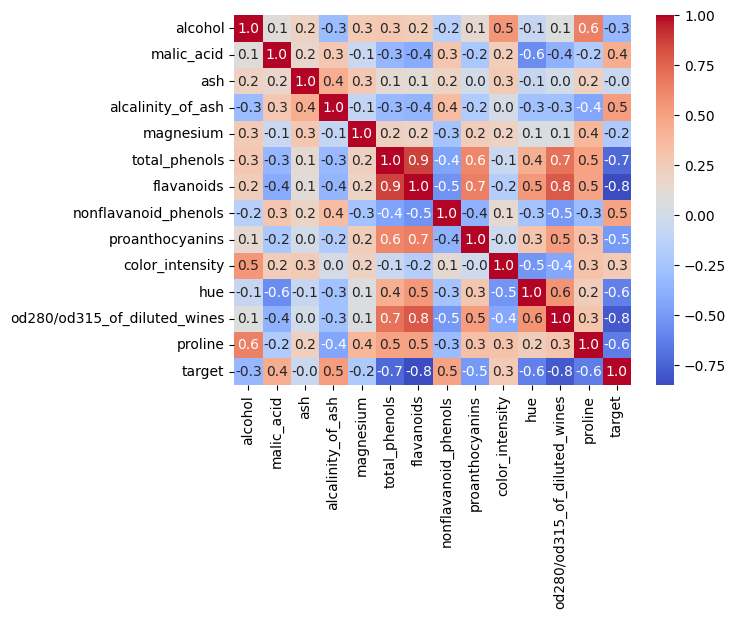

In [ ]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.1f')

## Violin Plot

<Axes: xlabel='target', ylabel='flavanoids'>

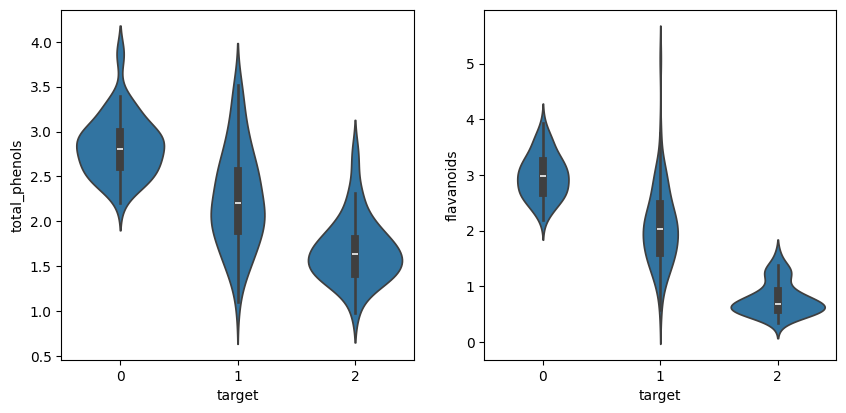

In [ ]:
plt.figure(figsize=(10,10))

plt.subplot(2,2,1)
sns.violinplot(x='target', y='total_phenols', data=df)

plt.subplot(2,2,2)
sns.violinplot(x='target', y='flavanoids', data=df)

## Scatter Plot

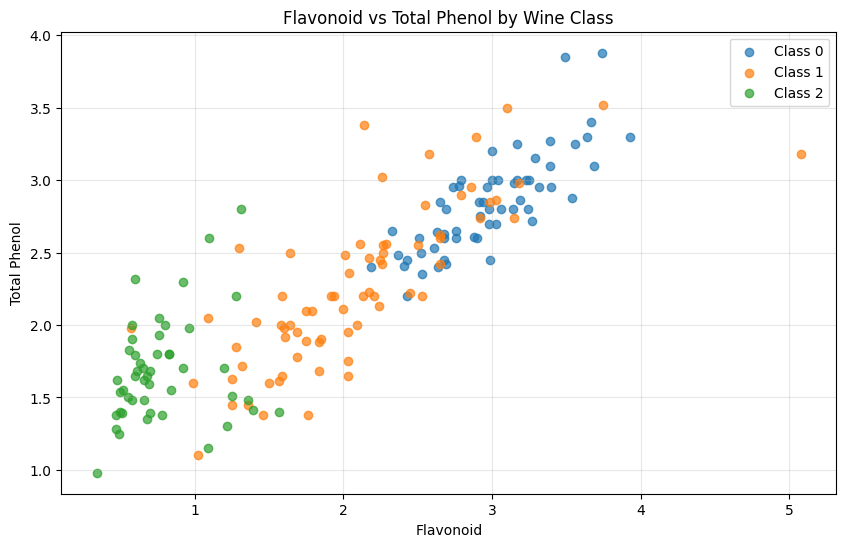

In [ ]:
# Create the plot
plt.figure(figsize=(10, 6)) # mainly used to dictate the size of the plot

# Plot each wine class separately
# Alternatives: feature_names & target_names instead of unique
# iterating eaching unique win_cass
for wine_class in df['target'].unique(): # iterating eaching unique win_cass
    class_data = df[df['target'] == wine_class] # create a new dataframe isolating each class
    plt.scatter(class_data['flavanoids'], # x axis
                class_data['total_phenols'], # y axis
                label=f'Class {wine_class}', # labeling each wine_class for legend
                alpha=0.7) # transparency of the scatter plot

plt.xlabel('Flavonoid')
plt.ylabel('Total Phenol')
plt.title('Flavonoid vs Total Phenol by Wine Class')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# you can avoid using 'for' loops everytime by using sns's hue paramenter.

## Linear Regression Relationship

<Figure size 1000x600 with 0 Axes>

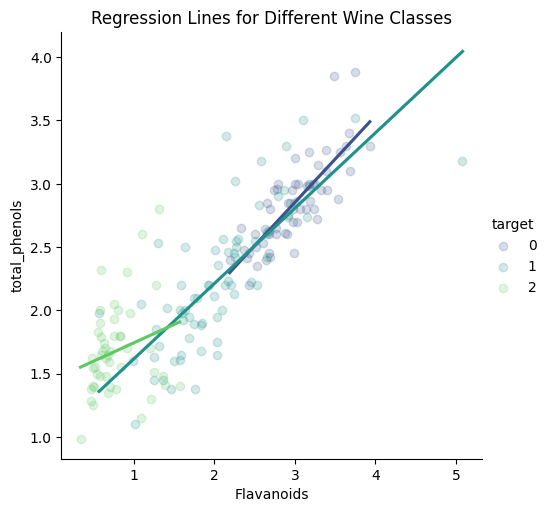

In [ ]:
#Extra Plot
#I just figured out you don't need a linear regression plot if you have a scatter plot

# Use seaborn's lmplot to plot the regression lines for each class
plt.figure(figsize=(10, 6)) # figsize will be adjusted internally by lmplot
sns.lmplot(x='flavanoids', y='total_phenols', hue='target', data=df, ci=None, palette='viridis', scatter_kws={'alpha': 0.2}) # or scatter paramenter - scatter=False

# Add titles and labels (lmplot returns a FacetGrid, so we set titles differently)
plt.gca().set_title('Regression Lines for Different Wine Classes') # get current axes will create new axes if there arent any because figure is returned with no axes
plt.xlabel('Flavanoids')
plt.ylabel('total_phenols')

# Show the plot
plt.show()

## Density Plot

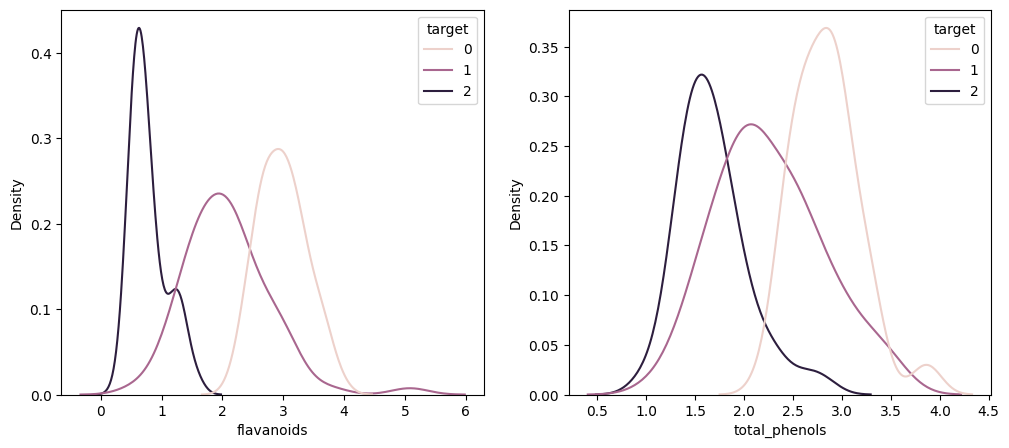

In [ ]:
# Having a Density Plot like Histogram or KDE (kernel density estimate)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5)) # row and columns, ax has to match row and columns
# Ex. fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(12, 10)) or fig, (ax1, ax2, ax3) for 3 plots in one row

sns.kdeplot(data=df, x='flavanoids', hue='target', ax=ax1) # seaborns' kde, optional - fill=True
sns.kdeplot(data=df, x='total_phenols', hue='target', ax=ax2)

plt.show()

## Summery
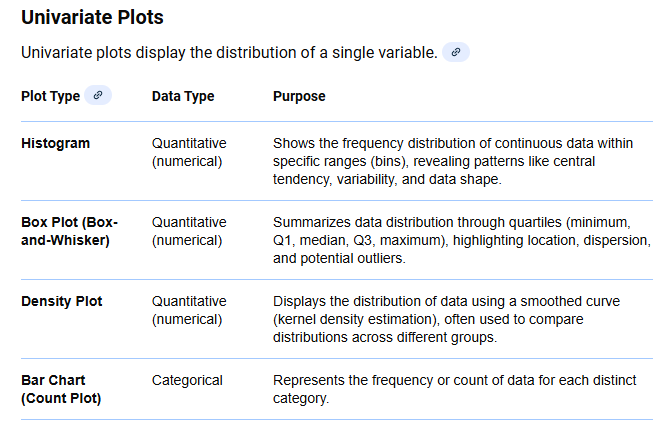
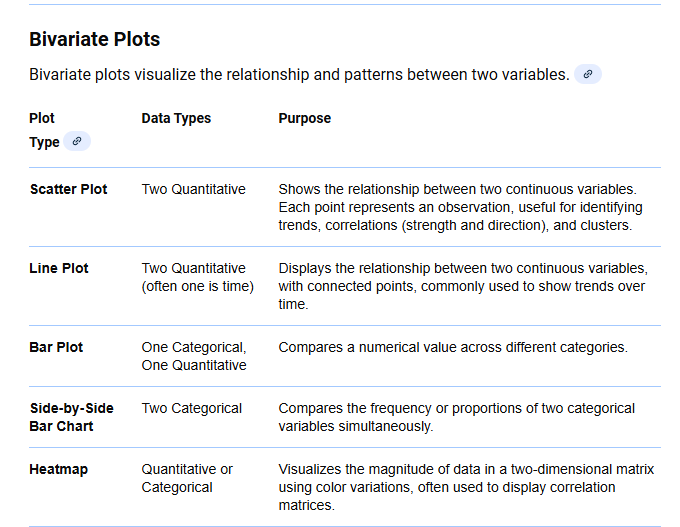


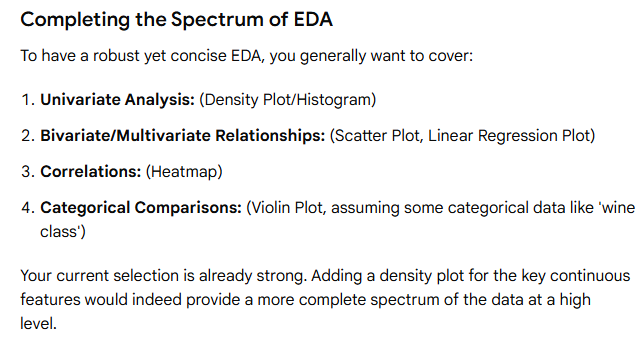

# Imports for Training - Sklearn


In [3]:
from sklearn.model_selection import train_test_split  # # to split the dataset for training and testing

from sklearn.neighbors import KNeighborsClassifier    # KNN classifier
from sklearn.svm import SVC                           # for suport vector machine algorithm
from sklearn.tree import DecisionTreeClassifier       # Decision Tree classifier
from sklearn.ensemble import RandomForestClassifier   # Random Forest classifier
from sklearn.linear_model import LogisticRegression   # Logistic Regression classifier

from sklearn import metrics                           # for checking the model accuracy

# Training using Classical Machine Learning

5 popular Classification Algos we will compare (there are more)


1.  Logistic Regression - Linear, interpretable, good baseline

2. KNN - Simple, instance-based, no assumptions about data

3. Decision Tree - White-box model, see exactly how decisions are made

4. Random Forest - More powerful version of decision trees (ensemble)

5. SVM - Finds complex boundaries, good for tricky patterns

Optional - Naive Bayes(spam detection)

**Now the given problem is a classification problem.. Thus we will be using the classification algorithms to build a model.**

**Classification:** Samples belong to two or more classes and we want to learn from already labeled data how to predict the class of unlabeled data

**Regression: **If the desired output consists of one or more continuous variables, then the task is called regression. An example of a regression problem would be the prediction of the length of a salmon as a function of its age and weight.

Before we start, we need to clear some ML notations.

*attributes-->An attribute is a property of an instance that may be used to determine its classification. In the following dataset, the attributes are columns in sub-section DESC. They are also known as Features.*

Target variable, in the machine learning context is the variable that is or should be the output. Here the target variables are the **3 [wine classes].**

[Source](https://github.com/venky14/Machine-Learning-with-Iris-Dataset/blob/master/Machine%20Learning%20with%20Iris%20Dataset.ipynb)

## Training Test Split

In [4]:
X = df[['flavanoids', 'total_phenols','od280/od315_of_diluted_wines']] # Features, added diluted wines, columnds without target, produces output
y = df['target'] # Target variable - 1 column, used to compare


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
# uneven target data in each class -- need to straify
# random_state seed allows reproductibility of experiment

## Logistic Regression

In [ ]:
model = LogisticRegression()
model.fit(X_train, y_train) # fitting training the best it can to get y_train
prediction = model.predict(X_test) # predict on unknown test data using model from training
print('The accuracy of Logistic Regression is: ', metrics.accuracy_score(prediction, y_test)) # compare prediciton output to real testing answers
# consistent accurancy 0.83

The accuracy of Logistic Regression is:  0.8333333333333334


## Decision Tree

In [ ]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
prediction = model.predict(X_test)
print('The accuracy of Decision Tree is: ', metrics.accuracy_score(prediction, y_test))
# accurancy inconsistent between 0.75 and 0.77

The accuracy of Decision Tree is:  0.7407407407407407


## KNN

In [ ]:
model = KNeighborsClassifier(n_neighbors=3) # this examines 3 neighbors for putting the data into class
model.fit(X_train, y_train)
prediction = model.predict(X_test)
print('The accuracy of KNN is: ', metrics.accuracy_score(prediction, y_test))

The accuracy of KNN is:  0.8888888888888888


([<matplotlib.axis.XTick at 0x7e4cdc356840>,
 [Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10')])

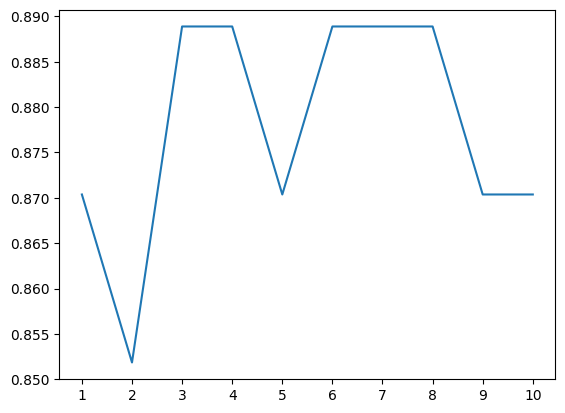

In [ ]:
a_index = list(range(1,11))
accuracy_scores = [] # Initialize an empty list to store accuracy scores
for i in list(range(1,11)):
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(X_train, y_train)
    prediction = model.predict(X_test)
    accuracy_scores.append(metrics.accuracy_score(prediction, y_test)) # Append accuracy to the list

a = pd.Series(accuracy_scores) # Create a Series from the list after the loop
plt.plot(a_index, a)

# differnt x-axis labels - previously 2,4,6...
x = [1,2,3,4,5,6,7,8,9,10]
plt.xticks(x)


## Support Vector Machine SVM

In [ ]:
model = SVC() # select SVC(classfication svm algo) from svm algorithm

# we train the algorithm with training data and training output
model.fit(X_train, y_train)

# we pass the testing data to the stored algorithm to predict the outcome
prediction = model.predict(X_test)
print('The accuracy of the SVM is: ', metrics.accuracy_score(prediction, y_test)) # we check the accuracy of the algorithm
#we pass the predicted output by the model and the actual output

The accuracy of the SVM is:  0.8888888888888888


## Random Forest

In [ ]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
prediction = model.predict(X_test)
print('The accuracy of Random Forest is: ', metrics.accuracy_score(prediction, y_test))

The accuracy of Random Forest is:  0.8888888888888888


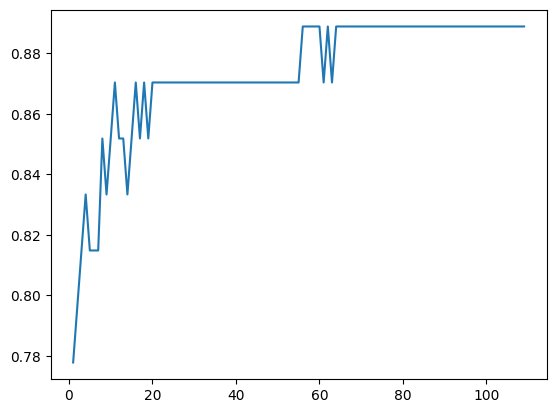

In [ ]:
a_index = list(range(1,110))
accuracy_scores = [] # Initialize an empty list to store accuracy scores
for i in list(range(1,110)):
    model = RandomForestClassifier(n_estimators=i, random_state=42)
    model.fit(X_train, y_train)
    prediction = model.predict(X_test)
    accuracy_scores.append(metrics.accuracy_score(prediction, y_test)) # Append accuracy to the list

a = pd.Series(accuracy_scores) # Create a Series from the list after the loop
plt.plot(a_index, a)


## Conclusion



1.   Best - , Worst -
2.   Desicion-Tree-Based algos have inconsistent accurancies on random seeds i.e. decision tree and ensemble/random forest



Possible Improvments:

*   Could try ML algos on single varibles




# Imports For Neural Network -TensorFlow

In [143]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

from sklearn.preprocessing import StandardScaler

# Learning Resources

TensorFlow, Keras and deep learning, without a PhD

https://codelabs.developers.google.com/codelabs/cloud-tensorflow-mnist

## Prep (Train_test_split)

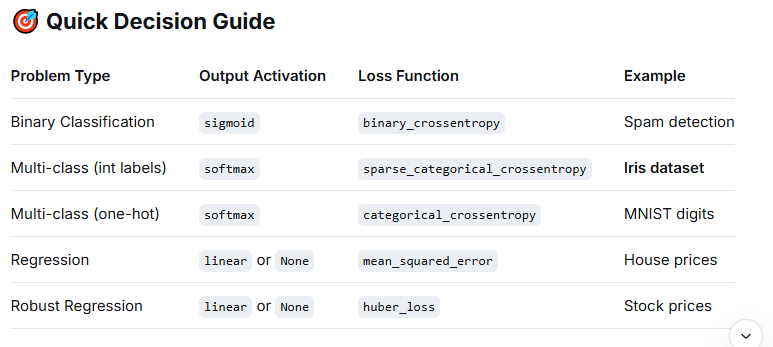

## Model

Total probability: The softmax function ensures that the output of all 3 neurons sums to 1, giving you a clear and interpretable probability distribution over the 3 classes. For example, the model might output [0.1, 0.8, 0.1], indicating a high probability that the input belongs to the second species.

In [137]:
# Create a sequential model
model = keras.Sequential([
    layers.Dense(100, activation='relu', input_shape=[X_train.shape[1]]), # expects a tuple for input)
    layers.BatchNormalization(), # turns data into a range from -1 to 1, i.e 500 lbs to 0.8 vs 10 to 0.1(random nums) fights against large numbers and smaller numbers
    layers.Dense(50, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.25),
    layers.Dense(25, activation='relu'),
    layers.Dense(3, activation='softmax') # Changed to 3 units for 3 classes
])


# Display model architecture
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_20"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_75 (Dense)                │ (None, 100)            │           400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_48          │ (None, 100)            │           400 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_76 (Dense)                │ (None, 50)             │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_49          │ (None, 50)             │           200 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_16 (Dropout)            │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_77 (Dense)                │ (None, 25)             │         1,275 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_78 (Dense)                │ (None, 3)              │            78 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,403 (28.92 KB)

 Trainable params: 7,103 (27.75 KB)

 Non-trainable params: 300 (1.17 KB)

## Compile

In [138]:
# Step 7: Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

## Train

In [144]:
# Step 8: Train the model
scaler = StandardScaler() # scaling data even though using batch norm
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("\nTraining the model...")
history = model.fit(X_train_scaled, y_train, epochs=500, verbose=0, batch_size=32, validation_data=(X_test, y_test)) # Train for 20 cycles


Training the model...


## Evaluate/Predict

In [148]:
# Step 9: Evaluate the model's performance
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test, verbose=0)
print(f"\nModel accuracy on the dataset: {test_accuracy:.2f}")


Model accuracy on the dataset: 0.85


## Visualize

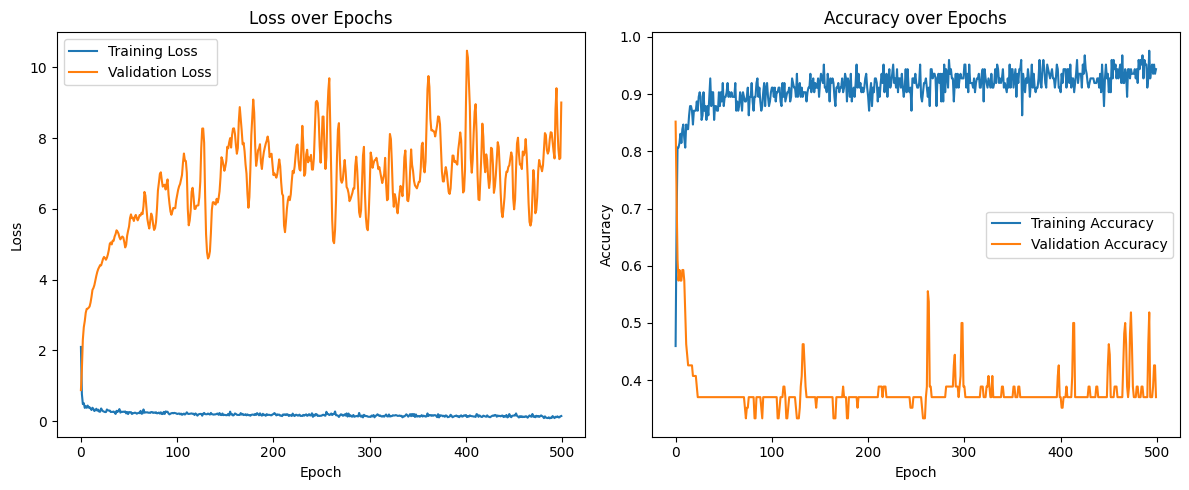

In [149]:
loss_values = history.history['loss']
val_loss_values = history.history['val_loss']
accuracy_values = history.history['accuracy']
val_accuracy_values = history.history['val_accuracy']

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5)) # row and columns, ax has to match rows and columbs
# Ex. fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(12, 10)) or fig, (ax1, ax2, ax3) for 3 plots in one row

ax1.plot(loss_values, label='Training Loss')
ax1.plot(val_loss_values, label='Validation Loss')
ax1.set_title('Loss over Epochs')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')
ax1.legend()

ax2.plot(accuracy_values, label='Training Accuracy')
ax2.plot(val_accuracy_values, label='Validation Accuracy')
ax2.set_title('Accuracy over Epochs')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Accuracy')
ax2.legend()

plt.tight_layout()
plt.show()

# Summery

Best Feature Combination for Best Accurancy

-Total Phenols & Flavanoids(based on heatmap)

Best ML Model

-KNN(0.88), SVM(0.88), Random Forest(Inconsistant, 0.87)

Highest Accurancy of DL Model

-0.85, on my own, after looking at sources

Possible Improvments:

Could try ML algos on single varibles